### **<span style="color:#023e8a;font-size:200%"><center>🔥🔥Street View Housing Number Digits Recognition🔥🔥</center></span>**
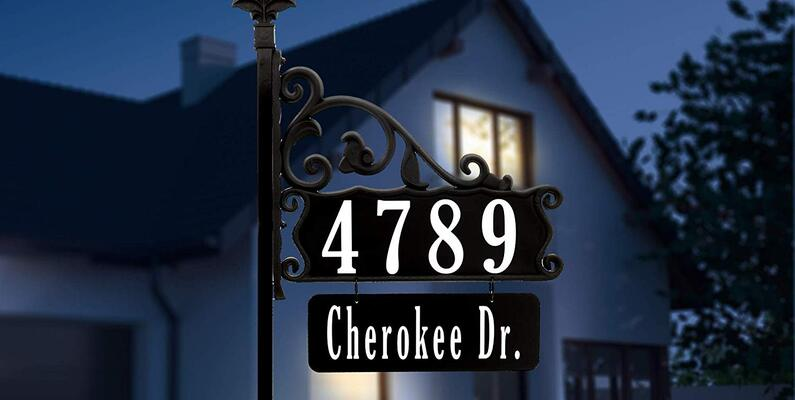

# **<a id="Content" style="color:#023e8a;">Table of Content</a>**
* [**<span style="color:#023e8a;">1. Problem Statement 👀</span>**](#1)  
* [**<span style="color:#023e8a;">2. Dataset Load and Visualizaton</span>**](#2)  
* [**<span style="color:#023e8a;">3. Pre-processing</span>**](#3)   
* [**<span style="color:#023e8a;">4. Build a Model </span>**](#4)   
* [**<span style="color:#023e8a;">5. Performance Evaluation and Visualization</span>**](#5) 
* [**<span style="color:#023e8a;">6. References</span>**](#6) 

# **<span id="1" style="color:#023e8a;">1. Problem Statemet 👀</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

## **<span style="color:#023e8a;">Context</span>**

**<span style="color:#023e8a;"> Recognizing things in their natural settings is one of the most fascinating challenges in the field of deep 
learning. </span>**

**<span style="color:#023e8a;">
The `SVHN` dataset includes approximately</span>** **<span style="color:#FF0000;">600,000 digits </span>** **<span style="color:#023e8a;">that have been identified and were `clipped` from `street-level photographs`. It has been put to use in the `neural networks` that </span>** **<span style="color:#FF0000;">Google </span>** **<span style="color:#023e8a;">has developed in order to</span>** **<span style="color:#FF0000;">enhance the quality of maps</span>**  **<span style="color:#023e8a;">by automatically`trancribing address numbers` from individual pixel clusters. The `combination` of the `transcribed number` and the `known street address` makes it easier to locate the building that the number represents.</span>**

## **<span style="color:#023e8a;">Objective</span>**
**<span style="color:#023e8a;">Develop a </span>** **<span style="color:#FF0000;">CNN model</span>** **<span style="color:#023e8a;">that is capable of `recognizing the digits` that are shown in the photos</span>**


## **<span style="color:#023e8a;">Dataset</span>**
**<span style="color:#023e8a;"> To `reduce` the amount of `time spent computing`, we will only utilize a `portion` of the whole original data. 
The dataset is supplied in the form of a `.h5 file`.  All of the `fundamental preprocessing procedures` have been `completed`.</span>**

In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Conv2D, Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **<span id="2" style="color:#023e8a;">2. Dataset Load and Visualization </span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

In [2]:
# Load data
file_name = "../input/street-view-housing-number-digits/SVHN_single_grey1.h5"

# To create an HDF5 file object
df = h5py.File(file_name, 'r')

# To see what is in dataset
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [3]:
# Convert all images from .h5 to numpy array
data = np.array(df)

test_x = np.array(df['X_test'])
train_x = np.array(df['X_train'])
val_x = np.array(df['X_val'])

test_y = np.array(df['y_test'])
train_y = np.array(df['y_train'])
val_y = np.array(df['y_val'])

In [4]:
# Checking type of converted array
print(type(test_x))
print(type(train_x))
print(type(val_x))
print(type(test_y))
print(type(train_y))
print(type(val_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## **<span style="color:#023e8a;">Class-wise Dataset Visualization</span>**

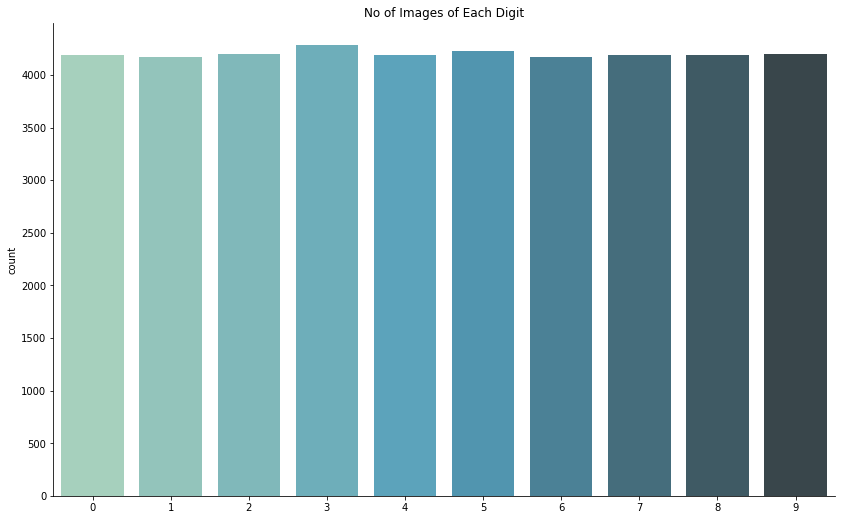

In [5]:
# To create a figure and a set of subplots
f, ax = plt.subplots(figsize=(14, 8.7))

# To show the counts of observations in each class using bars
ax = sns.countplot(x=train_y, palette="GnBu_d")

# To remove spines from top and right
sns.despine()

plt.title("No of Images of Each Digit")
plt.show()

**<span style="color:#023e8a;"> `countplot` indicates `dataset` is `balanced` i.e. no. of samples in all classes are almost same. </span>**

## **<span style="color:#023e8a;">Some Image Sample Visualization</span>**

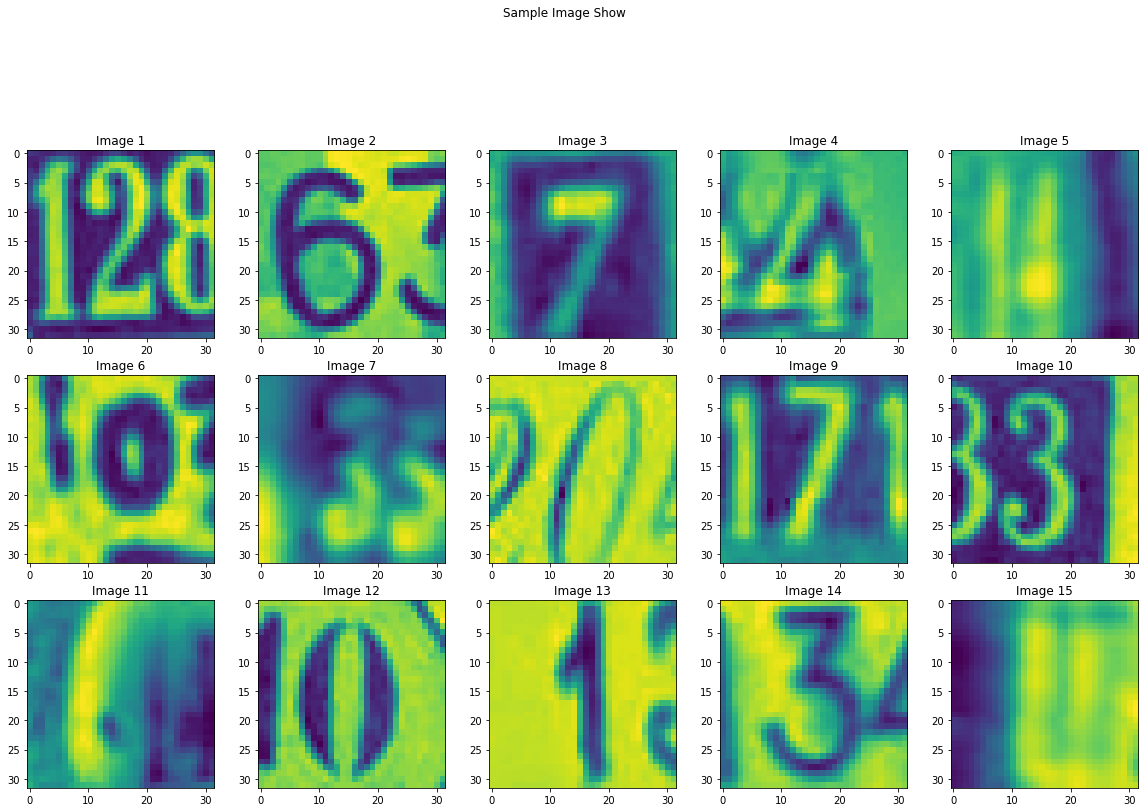

In [6]:
count = 1
plt.figure(figsize=[20, 20])
# To Add a centered suptitle
plt.suptitle("Sample Image Show")
for i in range(15):
    plt.subplot(5, 5, count) # To add or retrive axes
    plt.imshow(train_x[i])
    plt.title("Image %s" % count)
    count += 1
    
plt.show()

# **<span id="3" style="color:#023e8a;">3. Pre-processing </span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

In [7]:
# Checking Lowest and Highest Pixel Value
print("Lowest Pixel Value:", train_x[0].min())
print("Highest Pixel Value:", train_x[0].max())

Lowest Pixel Value: 14.5482
Highest Pixel Value: 130.4922


**<span style="color:#023e8a;"> Highest Pixel Value is `130.4922`, so </span>** **<span style="color:#FF0000;">MinMaxScaler()</span>**  **<span style="color:#023e8a;"> is used to `scaling` the pixel data `instead` of `dividing by 255`.  `Scaling the data` helps algorithm to `converge faster`.</span>**

## **<span style="color:#023e8a;">Scaling</span>**
**<span style="color:#023e8a;"> `MinMaxScaler()` : Transform features by scaling each feature to a given range</span>**
$$
x_{scaled} = \frac {x - x_{min}}{x_{max} - x_{min}}
$$

In [8]:
# Scaling the data
# To transform the features in a range with 0 mean and unit variance
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x.reshape(-1, train_x.shape[-1])).reshape(train_x.shape)
val_x = scaler.transform(val_x.reshape(-1, val_x.shape[-1])).reshape(val_x.shape)
test_x = scaler.transform(test_x.reshape(-1, test_x.shape[-1])).reshape(test_x.shape)

In [9]:
# Checking the data shape
train_x.shape

(42000, 32, 32)

**<span style="color:#023e8a;"> Data shape is 3D, CNN expects 4D input, </span>** **<span style="color:#FF0000;">reshape()</span>** **<span style="color:#023e8a;"> serves this purpose. </span>**

## **<span style="color:#023e8a;">Reshaping</span>**

In [10]:
# Adding 1 - diemension
# To return the same data with a new shape
train_x = train_x.reshape(-1, 32, 32, 1)
val_x = val_x.reshape(-1, 32, 32, 1)
test_x = test_x.reshape(-1, 32, 32, 1)

# **<span id="4" style="color:#023e8a;">4. Build a Model </span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

## **<span style="color:#023e8a;">Overfitting Prevention</span>**

In [11]:
# `EarlyStopping` is used based on `val_loss` to prevent overfitting
# When a monitored metric has stopped improving, training is stopped
es = EarlyStopping(monitor='val_loss', mode='auto', patience=3, restore_best_weights=True, verbose=1)

In [12]:
'''model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))'''
# model.evaluate(train_x, train_y) ---> [0.19503019750118256, 0.9379285573959351]
# model.evaluate(val_x, val_y) ---> [0.28566575050354004, 0.9225166440010071]
# model.evaluate(test_x, test_y) ---> [0.5004897713661194, 0.8812777996063232]

"model = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))"

In [13]:
'''model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))'''
# model.evaluate(train_x, train_y) ---> [0.1573583036661148, 0.9531905055046082]
# model.evaluate(val_x, val_y) ---> [0.26417824625968933, 0.9317833185195923]
# model.evaluate(test_x, test_y) ---> [0.513425350189209, 0.8818333148956299]

"model = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))"

In [14]:
'''
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
'''
# model.evaluate(train_x, train_y) ---> [0.20701883733272552, 0.9378095269203186]
# model.evaluate(val_x, val_y) ---> [0.25881287455558777, 0.9262333512306213]
# model.evaluate(test_x, test_y) ---> [0.37966570258140564, 0.899222195148468]

"\nmodel = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n"

In [15]:
'''model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))'''
# model.evaluate(train_x, train_y) ---> [0.15866588056087494, 0.9536666870117188]
# model.evaluate(val_x, val_y) ---> [0.21198126673698425, 0.9421833157539368]
# model.evaluate(test_x, test_y) ---> [0.33638328313827515, 0.9153888821601868]

"model = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dropout(0.1))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))"

In [16]:
'''
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
'''
# model.evaluate(train_x, train_y) [0.22513450682163239, 0.9315476417541504]
# model.evaluate(val_x, val_y) [0.2644910216331482, 0.921750009059906]
# model.evaluate(test_x, test_y) [0.3563232421875, 0.898888885974884]

"\nmodel = Sequential()\nmodel.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dropout(0.1))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n"

In [17]:
'''
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
'''
# [0.044254474341869354, 0.9872857332229614]
# [0.13606184720993042, 0.9684000015258789]
# [0.3502790033817291, 0.9243333339691162]

"\nmodel = Sequential()\nmodel.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dropout(0.1))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n"

In [18]:
'''
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
'''
# [0.0346575602889061, 0.9907143115997314]
# [0.12216148525476456, 0.9722999930381775]
# [0.32633763551712036, 0.9293333292007446]

"\nmodel = Sequential()\nmodel.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.1))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.1))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dropout(0.1))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n"

In [19]:
'''
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
'''
# [0.06522540003061295, 0.9815000295639038]
# [0.1350252777338028, 0.965316653251648]
# [0.29789218306541443, 0.9275555610656738]

"\nmodel = Sequential()\nmodel.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.1))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dropout(0.1))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n"

In [20]:
'''
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
'''
# Batch Size = 64
# [0.07315141707658768, 0.9797618985176086]
# [0.13296572864055634, 0.9652666449546814]
# [0.2725328207015991, 0.9314444661140442]
# Batch Size = 128
# [0.029258083552122116, 0.9923333525657654]
# [0.11366643756628036, 0.9742666482925415]
# [0.31061920523643494, 0.9321110844612122]

"\nmodel = Sequential()\nmodel.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dropout(0.1))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n"

In [21]:
'''
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
'''
# [0.04482574388384819, 0.9888809323310852]
# [0.10647489875555038, 0.9735333323478699]
# [0.2503229081630707, 0.9377222061157227]

"\nmodel = Sequential()\nmodel.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Flatten())\nmodel.add(Dropout(0.2))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\n"

## **<span style="color:#023e8a;">CNN Model</span>**
**<span style="color:#023e8a;"> `Custom CNN model` is developed with </span>**
* **<span style="color:#023e8a;"> 2 `Dense Layer` following 3 `Convolution Layer` </span>**
* **<span style="color:#023e8a;"> As activation function `relu` is used in `hidden layer` and `softmax` in `output layer` </span>**
* **<span style="color:#023e8a;"> In each Convolution Layer, `number of output filters` is set as `128` </span>**
* **<span style="color:#023e8a;"> Window size is set as `5 × 5` in `1st Conv Layer` and as `3 × 3` in `2nd and 3rd Layer` </span>**
* **<span style="color:#023e8a;"> Reason behind choosing different kernel size is `earlier layers` extract `generalized features` and `later layers` extract `more specific features` </span>**
* **<span style="color:#023e8a;"> `Dropout` is used to `reduce bias` due to `over-relying on one input`, thus prevents `overfitting` </span>**
* **<span style="color:#023e8a;"> `EarlyStopping` is used to `stop training` when the `validation error` is `increased` </span>**

**<span style="color:#023e8a;"> Different settings like `no of layers`, `no of neurons`, `window size`, `dropout rate` are set through experiment which works better  </span>**

In [22]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

2023-01-20 03:45:20.651698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 03:45:20.652640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 03:45:20.791205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 03:45:20.792577: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 03:45:20.793920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         1

## **<span style="color:#023e8a;">Train the model</span>**

In [25]:
history = model.fit(train_x, train_y, 
          batch_size=128,
          validation_data=(val_x, val_y), 
          callbacks=[es],
          epochs=50)

2023-01-20 03:45:25.134965: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-20 03:45:26.926845: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


329/329 [==============================] - 16s 19ms/step - loss: 1.3175 - accuracy: 0.5543 - val_loss: 0.6098 - val_accuracy: 0.8315
Epoch 2/50
329/329 [==============================] - 6s 17ms/step - loss: 0.5865 - accuracy: 0.8264 - val_loss: 0.4149 - val_accuracy: 0.8794
Epoch 3/50
329/329 [==============================] - 5s 17ms/step - loss: 0.4691 - accuracy: 0.8586 - val_loss: 0.3497 - val_accuracy: 0.8993
Epoch 4/50
329/329 [==============================] - 6s 17ms/step - loss: 0.4137 - accuracy: 0.8751 - val_loss: 0.3201 - val_accuracy: 0.9057
Epoch 5/50
329/329 [==============================] - 5s 17ms/step - loss: 0.3765 - accuracy: 0.8873 - val_loss: 0.2935 - val_accuracy: 0.9145
Epoch 6/50
329/329 [==============================] - 6s 17ms/step - loss: 0.3425 - accuracy: 0.8966 - val_loss: 0.2841 - val_accuracy: 0.9190
Epoch 7/50
329/329 [==============================] - 6s 17ms/step - loss: 0.3192 - accuracy: 0.9031 - val_loss: 0.2429 - val_accuracy: 0.9294
Epoch 8/5

## **<span style="color:#023e8a;">Accuracy and Loss Visualization</span>**

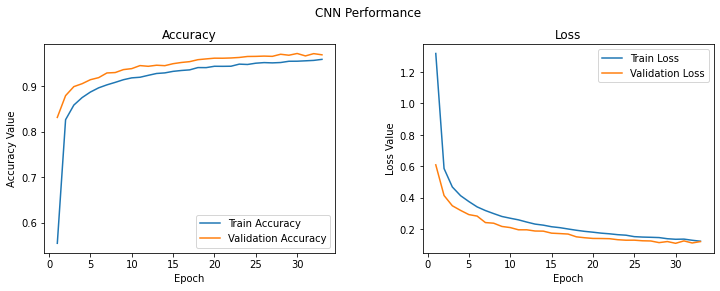

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,34))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 34, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 34, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

> ### **<span style="color:#023e8a;">Accuracy and Loss</span>**
> * **<span style="color:#023e8a;"> on both Train and Validation data is `improving` </span>**
> * **<span style="color:#023e8a;"> `Difference` between Train and Validation Data is `very little` </span>**
> * **<span style="color:#023e8a;"> `Curve` on Train and Validation data is `not zig-zagged`, rather `nearly smooth` </span>**

**<span style="color:#023e8a;"> That indicates, `model` is `good enough` to `recognize` </span>**
**<span style="color:#FF0000;">Street View Housing Number Digits </span>** 

In [28]:
model.evaluate(train_x, train_y)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0508 - accuracy: 0.9873


[0.05079013109207153, 0.9872857332229614]

## **<span style="color:#023e8a;">Save the Model</span>**

In [29]:
# Saving the Trained Model
model.save('CNN.h5')

## **<span style="color:#023e8a;">Load saved Model</span>**

In [30]:
# Load the saved Model
saved_model = load_model('CNN.h5')

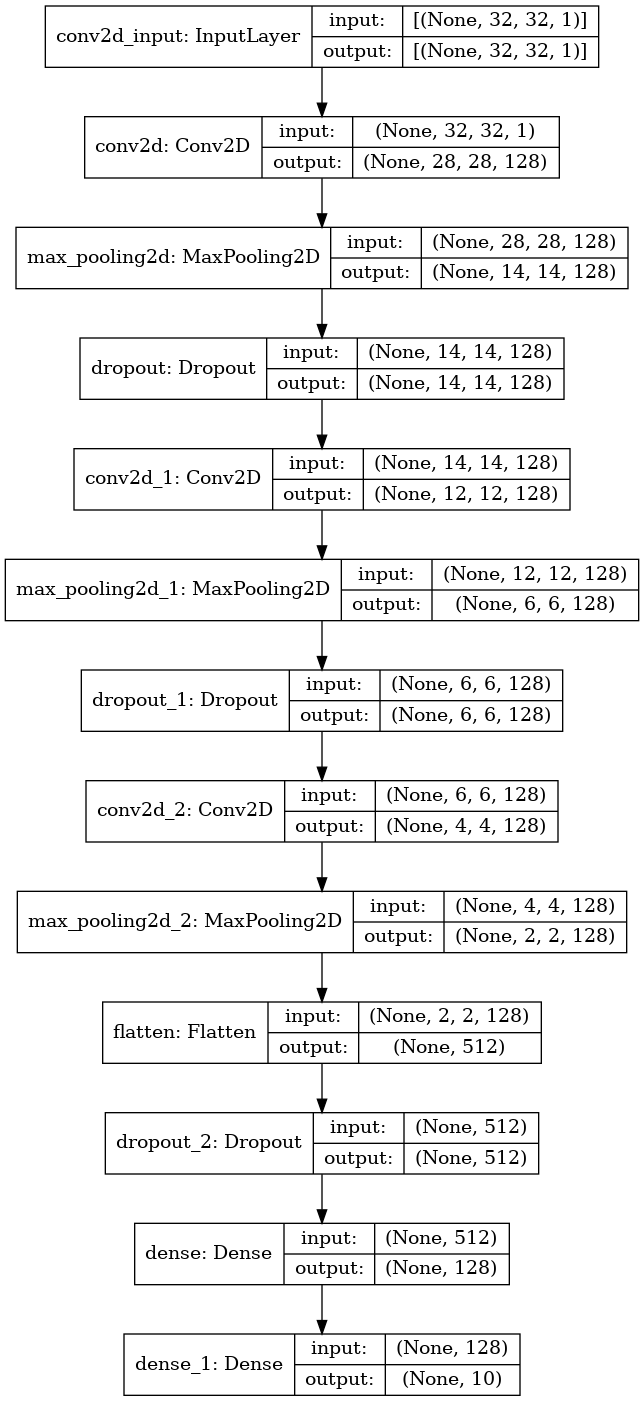

In [31]:
#Show Model Architecture
plot_model(saved_model,
          'CNN.h5.png',
          show_shapes=True,
          show_layer_names=True)

# **<span id="5" style="color:#023e8a;">5. Performance Evaluation </span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

In [32]:
# To check whether saved Model works or not
saved_model.evaluate(train_x, train_y)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0508 - accuracy: 0.9873


[0.05079013109207153, 0.9872857332229614]

**<span style="color:#023e8a;"> `Performance` of data using `built model` and `saved model` is `same`, so saved model works `properly`.</span>**

## **<span style="color:#023e8a;">Make Predictions</span>**

In [33]:
# Getting model predictions
test_predictions = saved_model.predict(test_x)
preds = np.argmax(test_predictions, axis=1)

## **<span style="color:#023e8a;">Classification Report</span>**
**<span style="color:#023e8a;">Returns Summary of</span>**
> * `Precision` : **<span style="color:#023e8a;"> What proportion of positive identifications was actually correct? </span>**
$$
Precision, P = \frac {TP}{TP + FP}
$$
> * `Recall` : **<span style="color:#023e8a;"> What proportion of actual positives was identified correctly? </span>**
$$
Recall, R = \frac {TP}{TP + FN}
$$
> * `F1 Score` : **<span style="color:#023e8a;"> Harmonic Mean of Precision and Recall. </span>**
$$
F1 Score = {2}\frac {P R}{P + R}
$$

In [34]:
# Showing Classification Report
# To build a  report on the classification metrics
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1814
           1       0.91      0.95      0.93      1828
           2       0.95      0.94      0.95      1803
           3       0.91      0.91      0.91      1719
           4       0.96      0.95      0.95      1812
           5       0.94      0.93      0.93      1768
           6       0.94      0.92      0.93      1832
           7       0.95      0.96      0.96      1808
           8       0.92      0.93      0.93      1812
           9       0.93      0.94      0.94      1804

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000



**<span style="color:#023e8a;"> `f1-score` indicates, `model` performs `well` to `recognize` </span>**
**<span style="color:#FF0000;">Street View Housing Number Digits </span>** 

## **<span style="color:#023e8a;">Confusion Matrix</span>**
* **<span style="color:#023e8a;"> It is a `performance measurement` for `machine learning classification problem` </span>**
* **<span style="color:#023e8a;"> `Output` can be `two or more` classes </span>**
* **<span style="color:#023e8a;"> It is a table with `4` different combinations of `predicted and actual values` </span>**
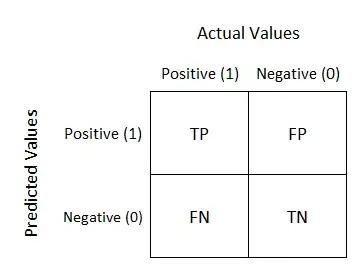

**<span style="color:#023e8a;"> Let’s understand TP, FP, FN, TN:</span>**
> * `True Positive`: **<span style="color:#023e8a;"> Model predicts `positive` and it’s `true` </span>**
> * `True Negative`: **<span style="color:#023e8a;"> Model predicts `negative` and it’s `true` </span>**
> * `False Positive`: **<span style="color:#023e8a;"> Model predicts `positive` and it’s `false` </span>**
> * `False Negative`: **<span style="color:#023e8a;"> Model predicts `negative` and it’s `false` </span>**

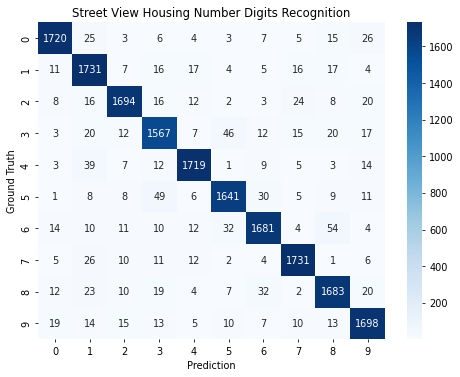

In [35]:
# Defining labels
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Plotting Confusion Matrix
# To evaluate the accuracy of the classification
cnf = confusion_matrix(test_y, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')

# Plotting rectangular data as a color-encoded matrix.
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('Street View Housing Number Digits Recognition')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

## **<span style="color:#023e8a;">ROC Curve</span>**
* **<span style="color:#023e8a;"> It's a `receiver operating characteristic` curve </span>**
* **<span style="color:#023e8a;"> It's a `performance measurement` for the `classification problems` at `various threshold` settings </span>**
* **<span style="color:#023e8a;"> The ROC curve is plotted with `TPR against the FPR` </span>**

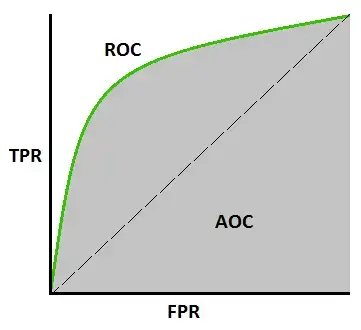

> * `True Positive Rate` :
$$
TPR = \frac {TP}{TP + FN}
$$
> * `False Positive Rate `:
$$
FPR = \frac {FP}{FP + TN}
$$
* **<span style="color:#023e8a;"> ROC is a probability curve and AUC is the measure of separability </span>**
* **<span style="color:#023e8a;"> AUC or area under the curve </span>**
> * `near to 1` ----> **<span style="color:#023e8a;"> good measure of separability </span>**
> * `near to 0` ----> **<span style="color:#023e8a;"> worst measure of separability </span>**
> * `0.5` ----> **<span style="color:#023e8a;"> no class separation capacity </span>**

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

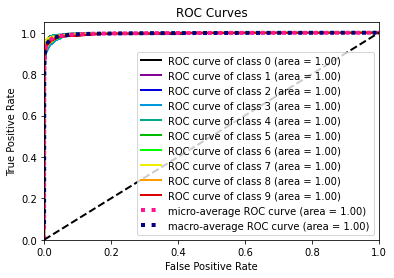

In [36]:
# Plotting ROC Curve
# Using labels and predicted scores, ROC Curve are generated
skplt.metrics.plot_roc(test_y, test_predictions)

**<span style="color:#023e8a;"> `AUC Score` indicates, `model` performance is quite  `satisfactory` to `recognize` </span>**
**<span style="color:#FF0000;">Street View Housing Number Digits </span>** 

## **<span style="color:#023e8a;">Visualize Model Predictions </span>**

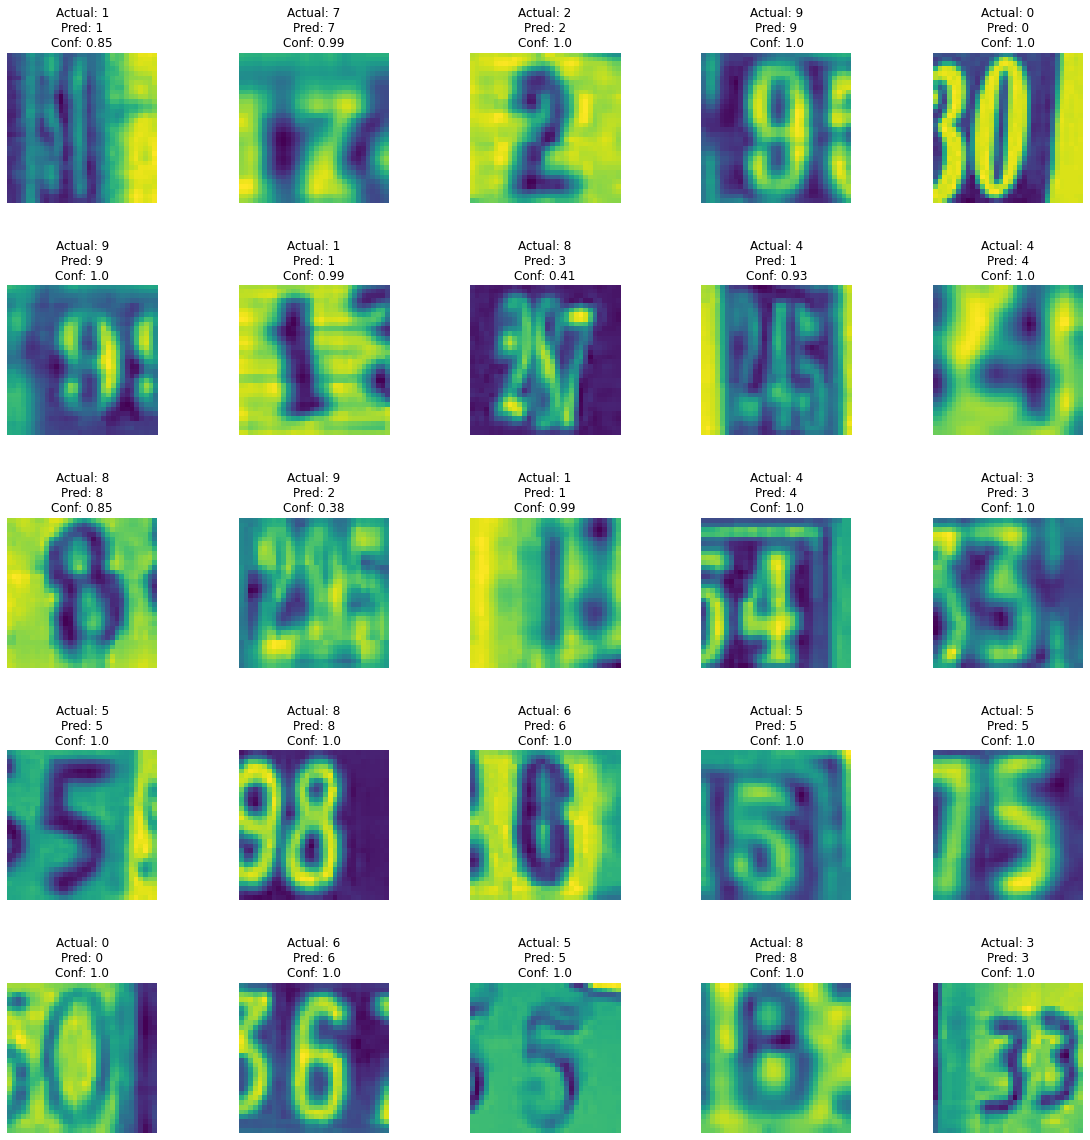

In [37]:
# Visualization of Predictions with Confidence
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = test_y[img_idx]
        predicted = preds[img_idx]
        confidence = round(test_predictions[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+str(actual)+'\nPred: '+str(labels[predicted])+ '\nConf: ' +str(confidence))
        ax[i][j].imshow(test_x[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)   

**<span style="color:#023e8a;"> We can see, most of the predictions are correct. We can improve model performance by </span>**
* **<span style="color:#023e8a;"> `enhancing` the `image quality` </span>**
* **<span style="color:#023e8a;"> using `Transfer Learning` </span>**

# **<span id="6" style="color:#023e8a;">6. References 📌</span>**
**<span style="color:#023e8a;"> Some of the notebooks used for preparing this notebook  </span>**
<ul>
        <li><a href="https://www.kaggle.com/code/farjanakabirsamanta/brain-tumor-mri-classification"> Brain Tumor MRI Classification 🧠</a></li>
    <li><a href="https://www.kaggle.com/code/vanguarde/nbme-eda"> NBME EDA 🩺</a></li>
</ul>

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Thanks for reading! Please feel free to provide your valuable feedback.</span></center>**